In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='windows-1252')

In [6]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
df.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [8]:
trdf = df[(df.country_txt == "Turkey")] # Republic of Turkey's Data

In [9]:
trdf.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
226,197004250001,1970,4,25,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,1,0,1,1,NaN
486,197008310001,1970,8,31,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
531,197010020002,1970,10,2,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
534,197010030001,1970,10,3,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
535,197010030002,1970,10,3,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


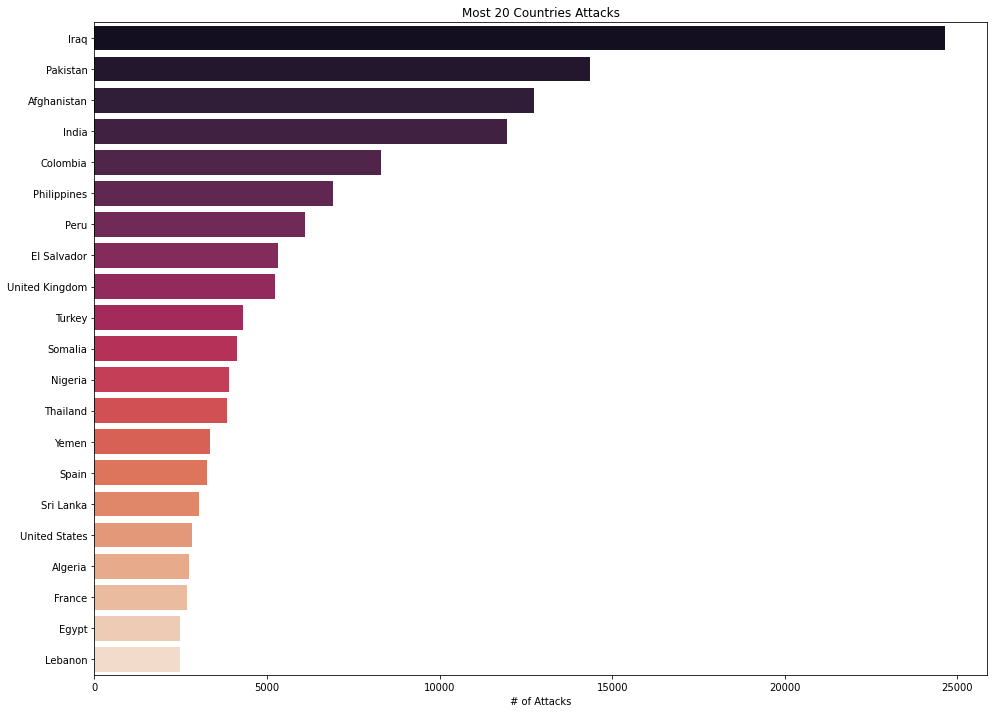

In [10]:
mostGlob = df.country_txt.value_counts()[:21]
plt.figure(figsize=(16,12))
ax = sns.barplot(x=mostGlob,y=mostGlob.index,palette="rocket")
plt.title("Most 20 Countries Attacks")
plt.xlabel("# of Attacks")
plt.show()

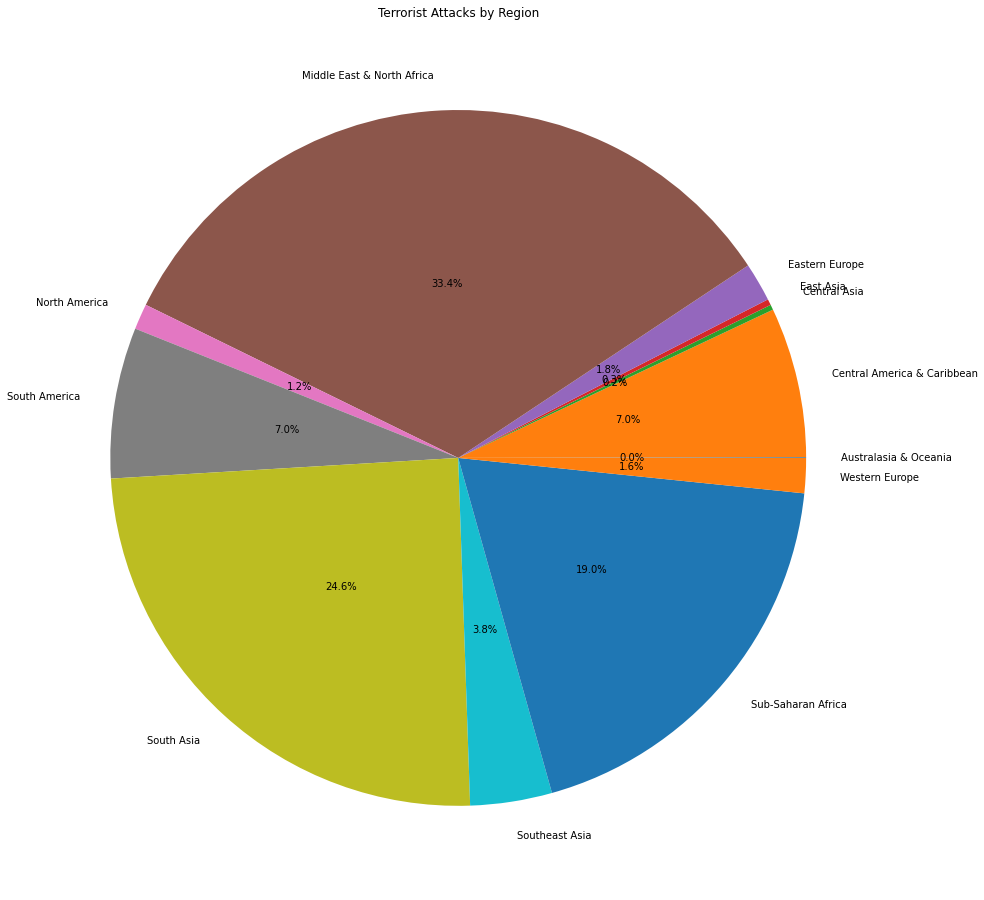

In [11]:
dfRegion = df.groupby('region_txt').sum()
labels = dfRegion.index
explode = [0,0,0,0,0,0,0,0,0,0,0,0]
size = dfRegion["nkill"].values

plt.figure(figsize=(16,16))
plt.pie(size,explode=explode,labels=labels,autopct="%1.1f%%",pctdistance=0.5)
plt.title("Terrorist Attacks by Region")
plt.show()

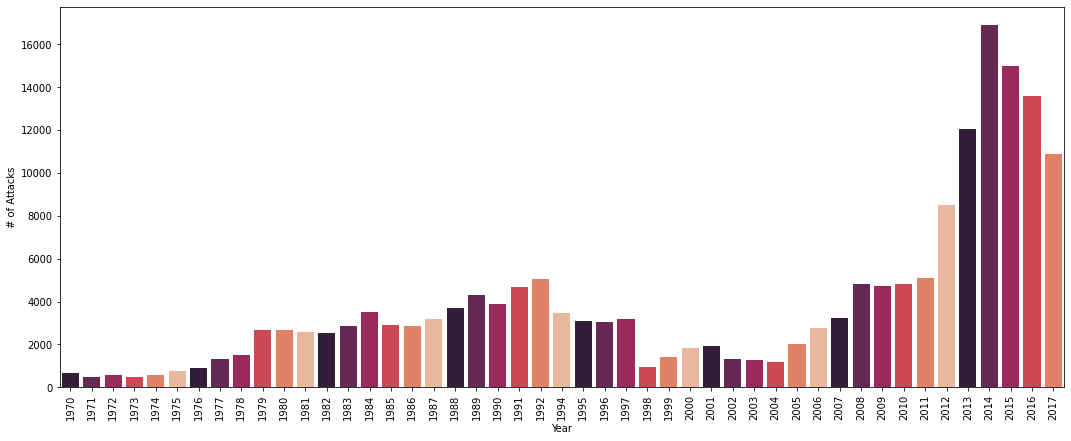

In [12]:
dfYear = list(zip(df.iyear.value_counts().index,df.iyear.value_counts().values))
dfYear = sorted(dfYear)
terrorByYear = []
terrorByCounts = []
for i in dfYear:
    terrorByYear.append(i[0])
    terrorByCounts.append(i[1])

plt.figure(figsize=(18,7))
sns.barplot(x=terrorByYear,y=terrorByCounts,palette=sns.color_palette("rocket"))
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("# of Attacks")
plt.show()

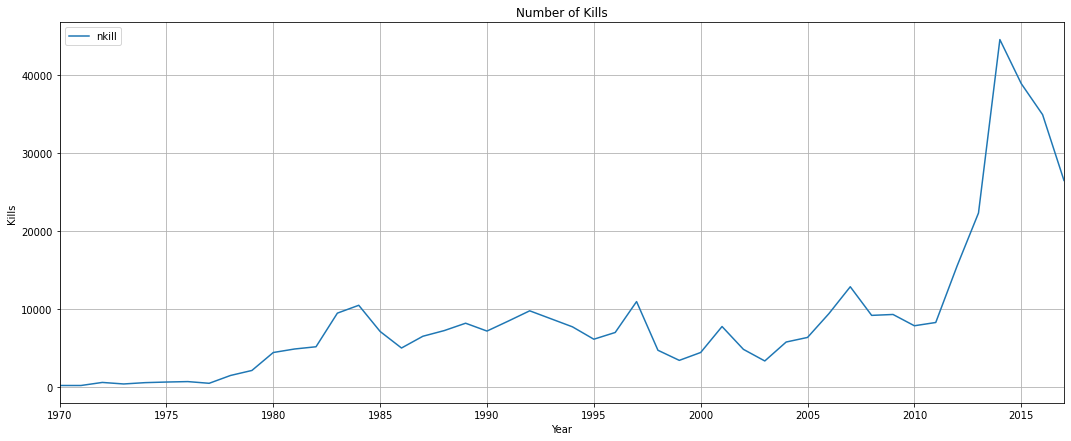

In [14]:
byYear = df.groupby("iyear").sum()
plt.figure(figsize=(18,7))
byYear.nkill.plot(grid=True)
plt.legend(loc="upper left")
plt.xticks(np.arange(byYear.index.min(),2018,5))
plt.xlabel("Year")
plt.ylabel("Kills")
plt.title("Number of Kills")
plt.show()

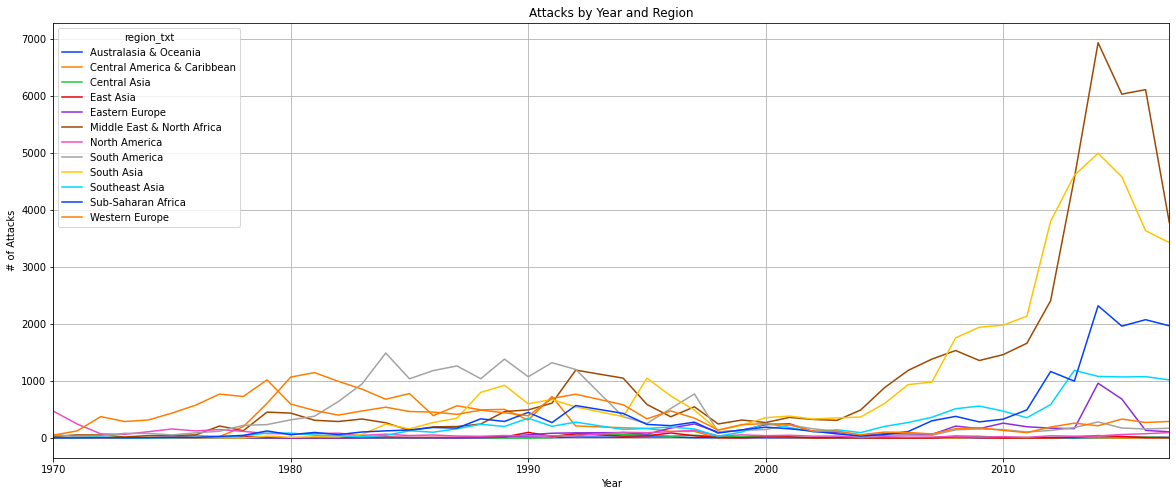

In [15]:
regionYear = pd.crosstab(df.iyear,df.region_txt)
regionYear.plot(color=sns.color_palette("bright",12),grid=True)
figure=plt.gcf()
figure.set_size_inches(20,8)
plt.xlabel("Year")
plt.ylabel("# of Attacks")
plt.title("Attacks by Year and Region")
plt.show()

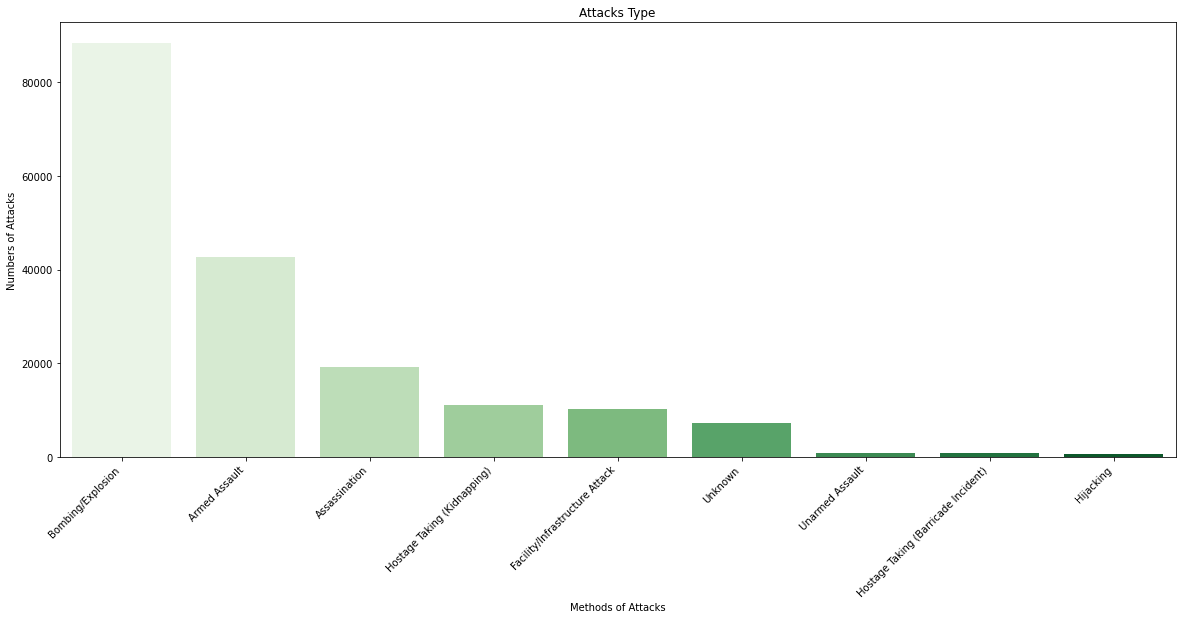

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(x=df.attacktype1_txt.value_counts().index,y=df.attacktype1_txt.value_counts().values,palette="Greens")
plt.xlabel("Methods of Attacks")
plt.ylabel("Numbers of Attacks")
plt.xticks(rotation=45, ha="right")
plt.title("Attacks Type")
plt.show()

In [17]:
trdf.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
226,197004250001,1970,4,25,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,1,0,1,1,NaN
486,197008310001,1970,8,31,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
531,197010020002,1970,10,2,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
534,197010030001,1970,10,3,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
535,197010030002,1970,10,3,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


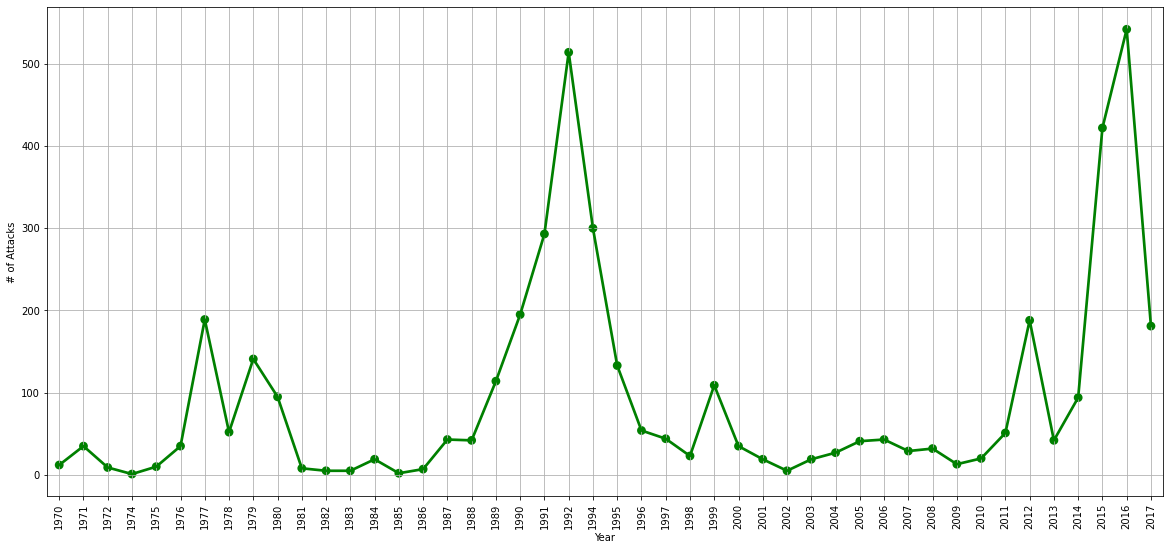

In [18]:
yeartr = trdf["iyear"].value_counts()
listofYear = sorted(list(zip(yeartr.index,yeartr.values)))
attackYear, attackCounts = zip(*listofYear)
attackYear, attackCounts = list(attackYear), list(attackCounts)

f,ax = plt.subplots(figsize=(20,9))
sns.pointplot(x=attackYear,y=attackCounts,color="Green")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("# of Attacks")
plt.grid()

In [19]:
trdf.gname

226                                           Palestinians
486                       Turkish People's Liberation Army
531       Turkish People's Liberation Front (TPLF)(THKP-C)
534                                                Unknown
535                       Turkish People's Liberation Army
                                ...                       
181486                      Kurdistan Workers' Party (PKK)
181529                      Kurdistan Workers' Party (PKK)
181607                                             Unknown
181610                      Kurdistan Workers' Party (PKK)
181611                      Kurdistan Workers' Party (PKK)
Name: gname, Length: 4292, dtype: object

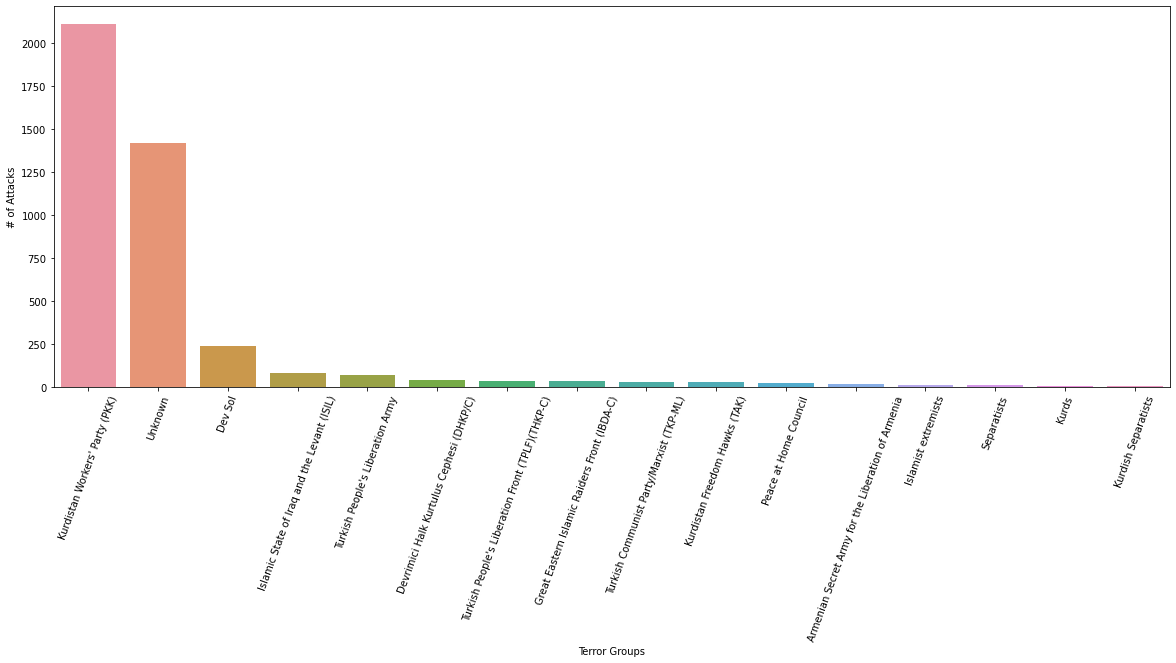

In [20]:
terrorTr = trdf.gname.value_counts()
terror15 = sorted(list(zip(terrorTr.values[:16],terrorTr.index[:16])),reverse=True)
attacksTr, terrorsTr = zip(*terror15)
attacksTr, terrorsTr = list(attacksTr), list(terrorsTr)

plt.figure(figsize=(20,7))
sns.barplot(x=terrorsTr,y=attacksTr)
plt.xticks(rotation=70)
plt.xlabel("Terror Groups")
plt.ylabel("# of Attacks")
plt.show()

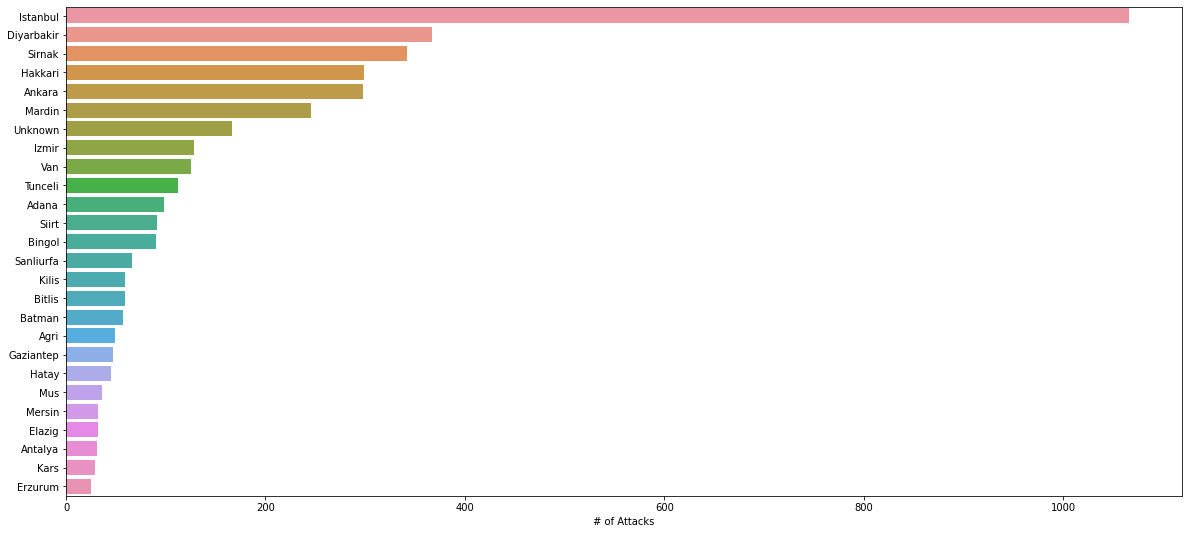

In [21]:
citiesTr = trdf["provstate"].value_counts()
citiesList = sorted(list(zip(citiesTr.values[:26],citiesTr.index[:26])),reverse=True)
citiesAttacked25, citiesCount25 = zip(*citiesList)
citiesAttacked25, citiesCount25 = list(citiesAttacked25), list(citiesCount25)

plt.figure(figsize=(20,9))
sns.barplot(x=citiesAttacked25,y=citiesCount25)
plt.xlabel("# of Attacks")
plt.show()

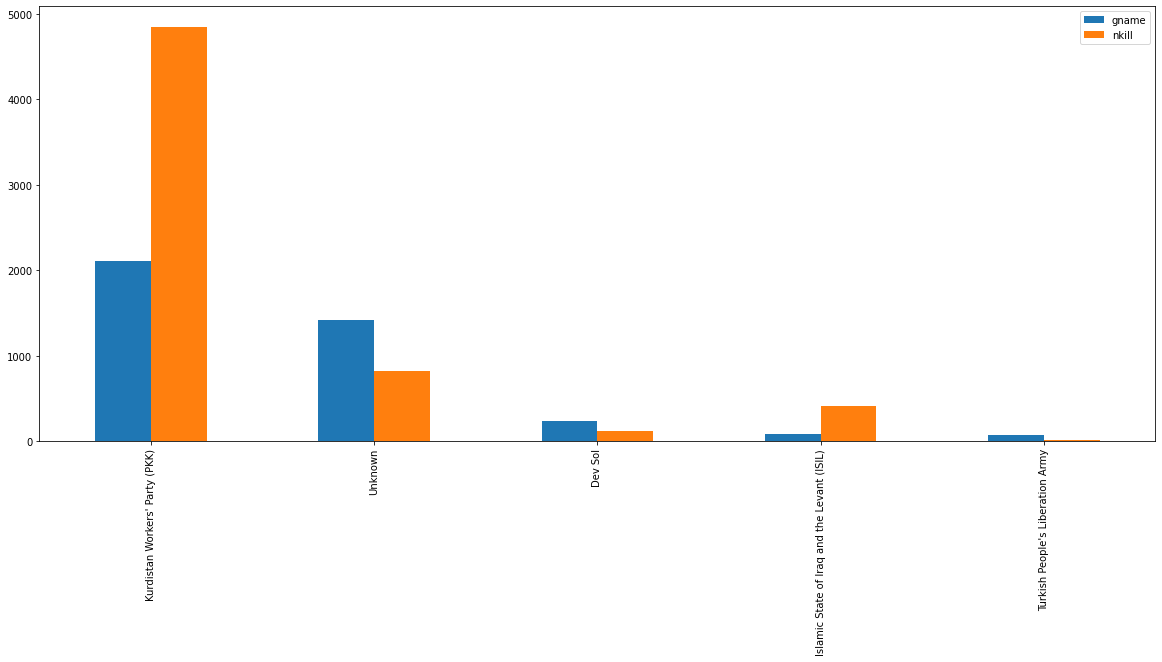

In [22]:
terrors = trdf.gname.value_counts()[:5].to_frame()
terrors.columns=["gname"]
kill = trdf.groupby("gname")["nkill"].sum().to_frame()
terrors.merge(kill,left_index=True,right_index=True,how="left").plot.bar()
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show()

In [23]:
usadf = df[(df.country_txt == "United States")] # Republic of Turkey's Data

In [24]:
usadf.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN
10,197001050001,1970,1,1,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


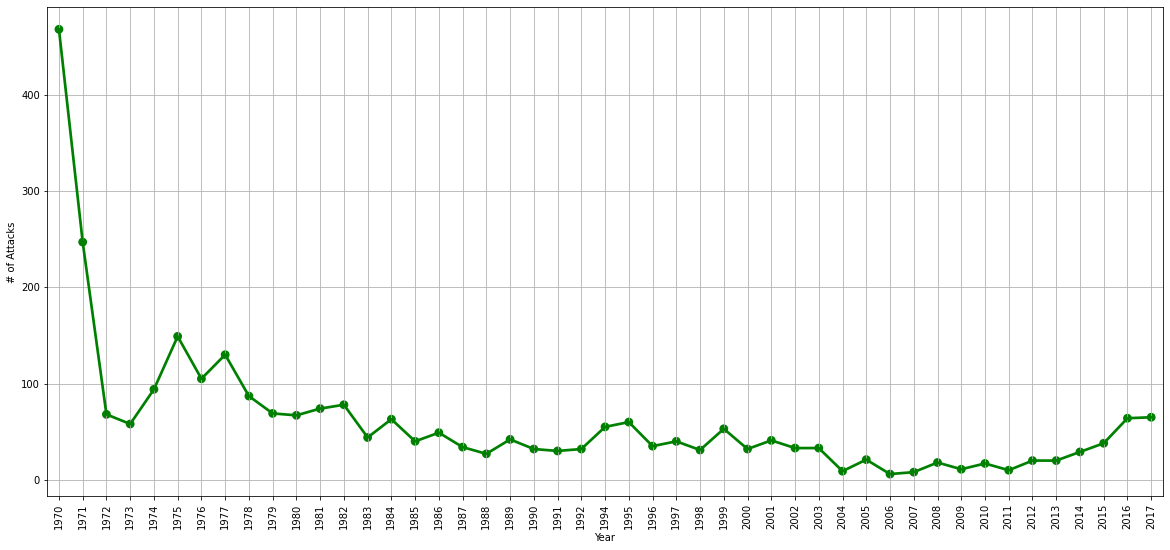

In [25]:
yearusa = usadf["iyear"].value_counts()
listofYear = sorted(list(zip(yearusa.index,yearusa.values)))
attackYear, attackCounts = zip(*listofYear)
attackYear, attackCounts = list(attackYear), list(attackCounts)

f,ax = plt.subplots(figsize=(20,9))
sns.pointplot(x=attackYear,y=attackCounts,color="Green")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("# of Attacks")
plt.grid()

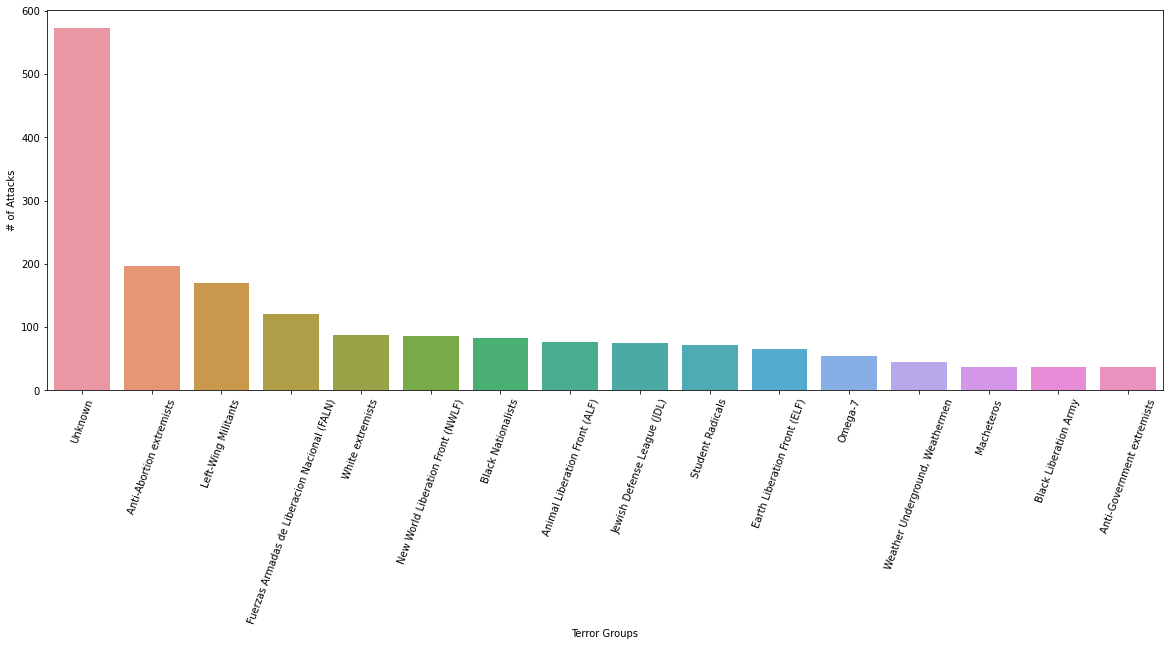

In [26]:
terrorUSA = usadf.gname.value_counts()
terror15 = sorted(list(zip(terrorUSA.values[:16],terrorUSA.index[:16])),reverse=True)
attacksUSA, terrorsUSA = zip(*terror15)
attacksUSA, terrorsUSA = list(attacksUSA), list(terrorsUSA)

plt.figure(figsize=(20,7))
sns.barplot(x=terrorsUSA,y=attacksUSA)
plt.xticks(rotation=70)
plt.xlabel("Terror Groups")
plt.ylabel("# of Attacks")
plt.show()

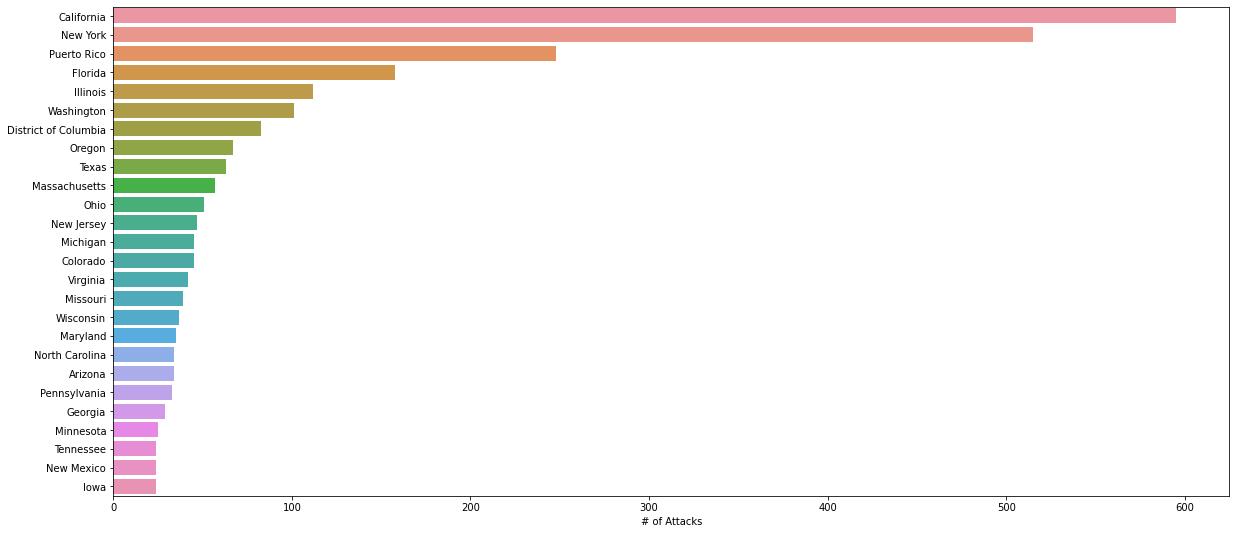

In [27]:
citiesUSA = usadf["provstate"].value_counts()
citiesList = sorted(list(zip(citiesUSA.values[:26],citiesUSA.index[:26])),reverse=True)
citiesAttacked25, citiesCount25 = zip(*citiesList)
citiesAttacked25, citiesCount25 = list(citiesAttacked25), list(citiesCount25)

plt.figure(figsize=(20,9))
sns.barplot(x=citiesAttacked25,y=citiesCount25)
plt.xlabel("# of Attacks")
plt.show()

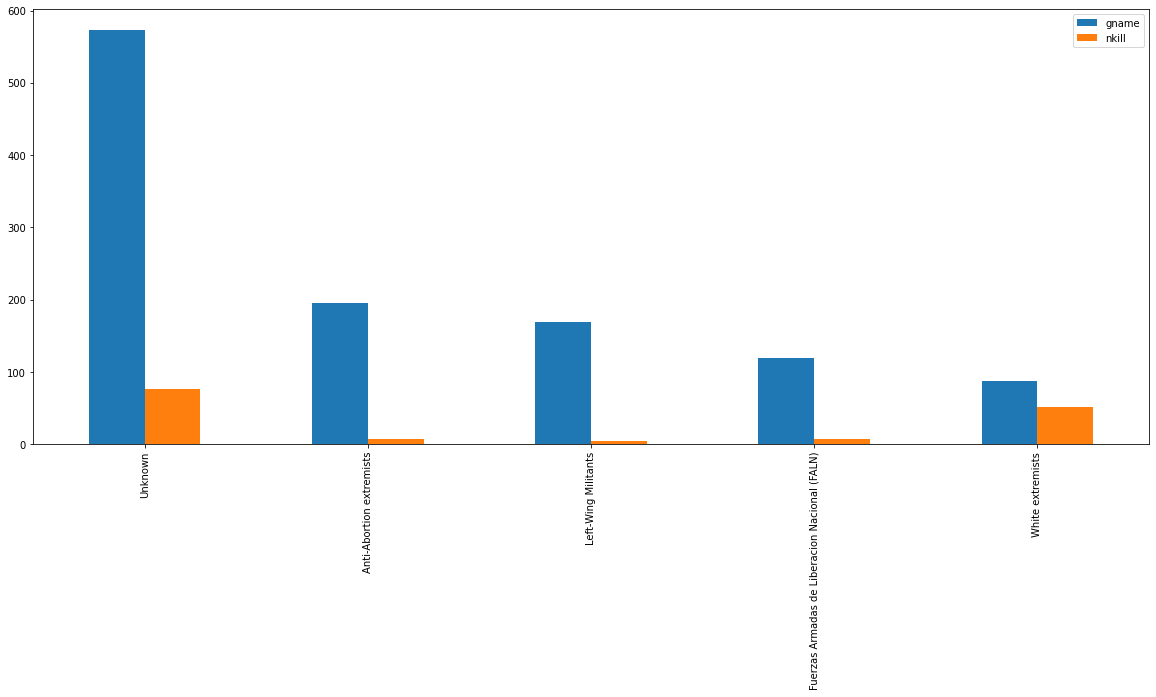

In [28]:
terrors = usadf.gname.value_counts()[:5].to_frame()
terrors.columns=["gname"]
kill = usadf.groupby("gname")["nkill"].sum().to_frame()
terrors.merge(kill,left_index=True,right_index=True,how="left").plot.bar()
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show()

In [29]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [30]:
gerdf = df[(df.country_txt=="Germany")]

In [31]:
Japandf = df[(df.country_txt=="Japan")]

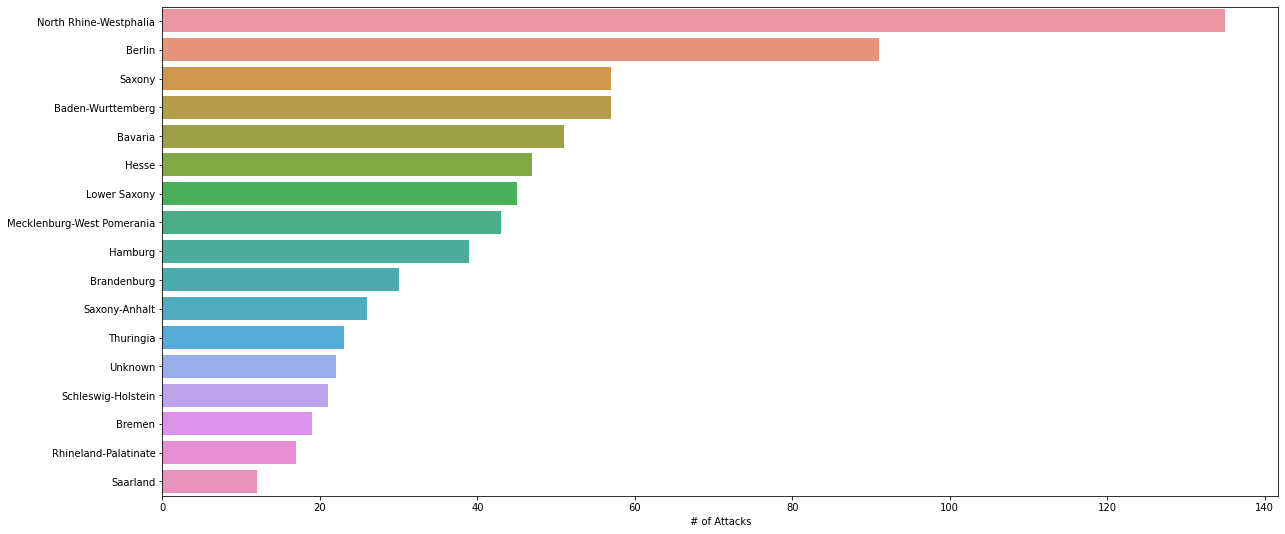

In [32]:
citiesGermany = gerdf["provstate"].value_counts()
citiesList = sorted(list(zip(citiesGermany.values[:26],citiesGermany.index[:26])),reverse=True)
citiesAttacked25, citiesCount25 = zip(*citiesList)
citiesAttacked25, citiesCount25 = list(citiesAttacked25), list(citiesCount25)

plt.figure(figsize=(20,9))
sns.barplot(x=citiesAttacked25,y=citiesCount25)
plt.xlabel("# of Attacks")
plt.show()

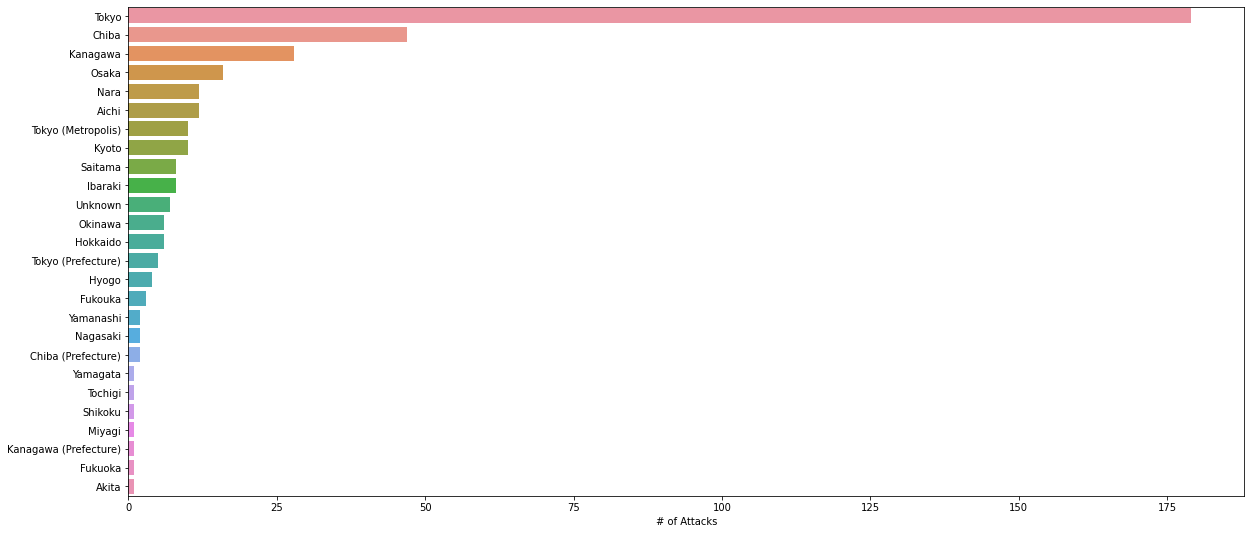

In [33]:
citiesJapan = Japandf["provstate"].value_counts()
citiesList = sorted(list(zip(citiesJapan.values[:26],citiesJapan.index[:26])),reverse=True)
citiesAttacked25, citiesCount25 = zip(*citiesList)
citiesAttacked25, citiesCount25 = list(citiesAttacked25), list(citiesCount25)

plt.figure(figsize=(20,9))
sns.barplot(x=citiesAttacked25,y=citiesCount25)
plt.xlabel("# of Attacks")
plt.show()